# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

import matplotlib.pyplot as plt

### Now take a look at the shapes of the X and y matricies 

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [5]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

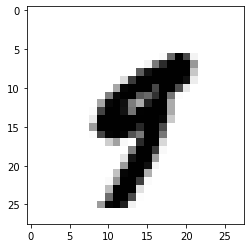

In [6]:
plt.imshow(X[36000].reshape(28,28) , cmap = plt.cm.binary, interpolation="nearest")


### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [25]:
y[36000]

'9'

Yes, we can say that the plot shows a 9 and the outcome also shows a 9.

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [8]:
X_train = X[:60000] 
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [29]:
# We want to create a new variable that tells us whether there is  5 or not, in order to classify that there is 
# a 5 or not
y5 = np.array(list(map(lambda y:1 if y=='5' else 0, y)))

#less_than_zero = list(filter(lambda x: x < 0, number_list))

In [30]:
# Checking the type of y5, to check that is an array
type(y5)

numpy.ndarray

In [31]:
# Checking the shape of the array to see that we have all the elements 
y5.shape

(70000,)

In [32]:
# Splitting our new target vector y5 into train and test. 
y5_train = y5[:60000]
y5_test = y5[60000:]

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [33]:
# Importing the library for a logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

In [ ]:
# Creating an instance for the logistic regression 
logreg = LogisticRegression()

# Fitting the logistic regression with X_train and y5_train
logreg.fit(X_train, y5_train)
logreg.predict(X_test)

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Does the classifier predict correctly the 36000th digit we picked before?

In [36]:
# Since the 36000th digit is on the train test, we predict all the values, not only the test set,
# in order to see if the value predicted is a 5 or not. 
y5_pred = logreg.predict(X)

In [37]:
y5_pred[36000]

0

Yes, it predicted 0 and 0 is that the number is **not** a five, since it is a 9

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [38]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

### Now find the roc_auc_score for each. 

### What does this metric tell you? Which classifier works better with this metric in mind?